In [312]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import operator
import numpy as np

In [313]:
df = pd.read_csv("train.csv")

# Pie chart

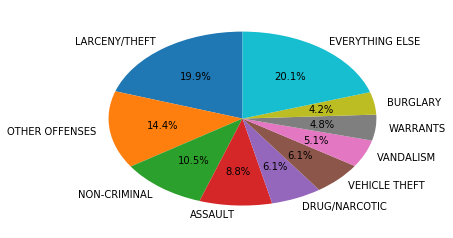

In [314]:
count = Counter(df.Category)
key = sorted(count, key=count.__getitem__, reverse=True)
value = sorted(count.values(), reverse=True)

labels = key[:9]
labels.append("EVERYTHING ELSE")
frequency = value[:9]
frequency.append(sum(value[9:]))

plt.pie(frequency, labels=labels, startangle=90, autopct='%.1f%%')
plt.show()

### Gráfico que ilustra a frequência histórica de cada crime. Foram escolhidos os 9 crimes mais frequentes e o restante é representado pela categoria "EVERYTHING ELSE".

# Stacked Bar Plot

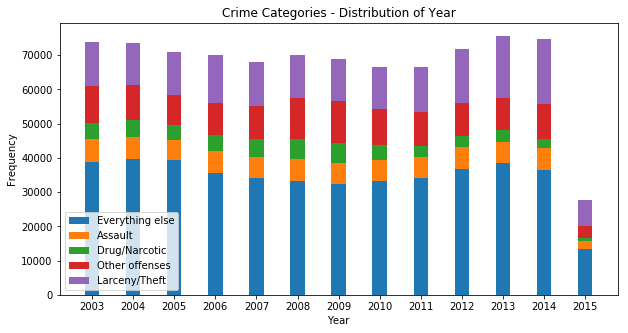

In [315]:
list_years = np.sort(df.Year.unique())

larceny = []
other = []
narcotic = []
assault = []
eelse = []

for i in list_years:
    count = Counter(df.Category.loc[df.Year == i])
    value = sorted(count.values(), reverse=True)
    larceny.append(count.get("LARCENY/THEFT"))
    other.append(count.get("OTHER OFFENSES"))
    narcotic.append(count.get("DRUG/NARCOTIC"))
    assault.append(count.get("ASSAULT"))
    eelse.append(sum(value) - larceny[-1] - other[-1] - narcotic[-1] - assault[-1])

N = len(list_years)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize = (10,5))

p1 = plt.bar(ind, eelse, width)
p2 = plt.bar(ind, assault, width, bottom = eelse)
p3 = plt.bar(ind, narcotic, width, bottom = list(np.array(eelse) + np.array(assault)))
p4 = plt.bar(ind, other, width, bottom = list(np.array(eelse) + np.array(assault) + np.array(narcotic)))
p5 = plt.bar(ind, larceny, width, bottom = list(np.array(eelse) + np.array(assault) + np.array(narcotic) + np.array(other)))

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Crime Categories - Distribution of Year')
plt.xticks(ind, list_years)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Everything else', 'Assault', 'Drug/Narcotic', 'Other offenses', 'Larceny/Theft'), loc='lower left')

plt.show()

### Análise histórica dos crimes cometidos para cada categoria. Verifica-se que a quantidade de crimes cometidos oscilou pouco, ocorrendo uma leve redução entre os anos 2003 e 2011. Em 2013, porém, registrou-se o maior número de crimes comparados aos últimos anos. Em 2015, os crimes foram registrados até o mês de maio, o que tornou a análise incompleta para o mesmo ano.

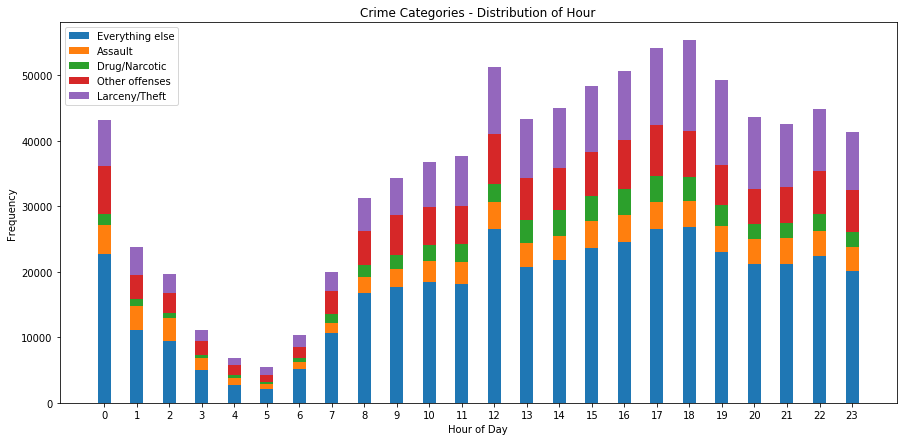

In [316]:
list_hour = np.sort(df.Hour.unique())

larceny = []
other = []
narcotic = []
assault = []
eelse = []

for h in list_hour:
    count = Counter(df.Category.loc[df.Hour == h])
    value = sorted(count.values(), reverse=True)
    larceny.append(count.get("LARCENY/THEFT"))
    other.append(count.get("OTHER OFFENSES"))
    narcotic.append(count.get("DRUG/NARCOTIC"))
    assault.append(count.get("ASSAULT"))
    eelse.append(sum(value) - larceny[-1] - other[-1] - non_criminal[-1] - assault[-1])
    
N = len(list_hour)

ind = np.arange(N)    # the x locations for the groups
width = 0.4       # the width of the bars: can also be len(x) sequence

plt.figure(figsize = (15,7))

p1 = plt.bar(ind, eelse, width)
p2 = plt.bar(ind, assault, width, bottom = eelse)
p3 = plt.bar(ind, narcotic, width, bottom = list(np.array(eelse) + np.array(assault)))
p4 = plt.bar(ind, other, width, bottom = list(np.array(eelse) + np.array(assault) + np.array(narcotic)))
p5 = plt.bar(ind, larceny, width, bottom = list(np.array(eelse) + np.array(assault) + np.array(narcotic) + np.array(other)))

plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Crime Categories - Distribution of Hour')
plt.xticks(ind, list_hour)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Everything else', 'Assault', 'Drug/Narcotic', 'Other offenses', 'Larceny/Theft'), loc='upper left')

plt.show()

### Também verifica-se que o tipo de crime cometido pode variar ao longo do dia. Em determinadas horas do dia, "outras ofensas" torna-se mais frequente do que "furtos/roubos". O horário "pico" de crimes são às 18 h.